<a href="https://colab.research.google.com/github/ironmanjiwon/AI-final_exam/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EB%A7%90_12_06_09(%EB%AA%A9)%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 import**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import matplotlib.pyplot as plt

print(keras.__version__)
tf.config.list_physical_devices('GPU')

2.8.0


[]

# **2. Data Load**

In [5]:
num_classes = 7   # angry, disgust, fear, happy, neutral, sad, and surprise

In [11]:
import numpy as np

train_set = np.loadtxt('fer2013_training_onehot.csv', delimiter=',') #"D:\CSV\fer2013_training_onehot.csv"
test_set = np.loadtxt('fer2013_publictest_onehot.csv', delimiter=',') #"D:\CSV\fer2013_publictest_onehot.csv"

train_set
test_set

array([[254., 254., 254., ...,   0.,   0.,   0.],
       [156., 184., 198., ...,   0.,   0.,   0.],
       [ 69., 118.,  61., ...,   1.,   0.,   0.],
       ...,
       [255., 255., 255., ...,   1.,   0.,   0.],
       [ 33.,  25.,  31., ...,   1.,   0.,   0.],
       [ 61.,  63.,  59., ...,   1.,   0.,   0.]])

In [22]:
n_input = 2304
n_class = 7
image_d = 48

x_train = train_set[:, 0:n_input]
y_train = train_set[:, n_input:n_input + n_class]

x_test = test_set[:, 0:n_input]
y_test = test_set[:, n_input:n_input + n_class]

x_train = x_train.reshape(x_train.shape[0], 48, 48)
print(x_train.shape)

x_train = np.expand_dims(x_train, axis=3)
print(x_train.shape)

x_test = x_test.reshape(x_test.shape[0], 48, 48)
x_test = np.expand_dims(x_test, axis=3)

(28709, 48, 48)
(28709, 48, 48, 1)


# **3. Model 생성**

In [31]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

model_1 = models.Sequential()
model_1.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='conv1_1', input_shape=(48,48,1)))
model_1.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu', name='conv1_2'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2), name='pooling1'))
model_1.add(Dropout(rate=0.5, name='conv_dropout1'))

model_1.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='conv2_1'))
model_1.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu', name='conv2_2'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2), name='pooling2'))
model_1.add(Dropout(rate=0.5, name='conv_dropout2'))

model_1.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='conv3_1'))
model_1.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='relu', name='conv3_2'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2), name='pooling3'))
model_1.add(Dropout(rate=0.5, name='conv_dropout3'))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=2048, activation='relu', name='fc1'))
model_1.add(layers.Dropout(rate=0.5, name='fc_dropout1'))
model_1.add(layers.Dense(units=num_classes, activation='softmax', name='fc_softmax'))

model_1.summary()

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155637 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 12.9 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=411c1939b8566df0982f5fb1e16bad22814f00ca5d719e6dfb3c9f7e5b47196c
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


NameError: ignored

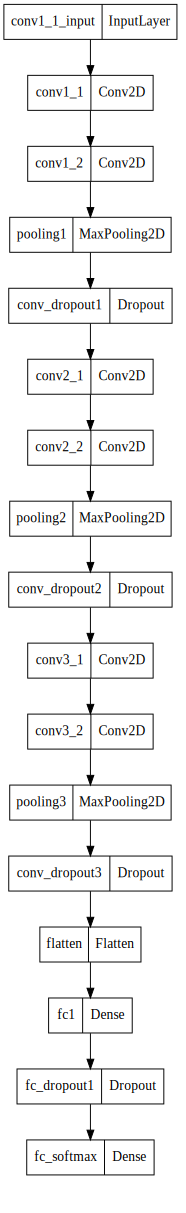

In [ ]:
SVG(model_to_dot(model_1, dpi=70).create(prog='dot', format='svg'))

# **4. Model Train**

In [24]:
loss = 'categorical_crossentropy'
lr = 0.0001
model_1.compile(loss=loss, optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

batch = 128
epoch = 30

starting_time = time.time()
history = model_1.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = batch, epochs=epoch)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

NameError: ignored

# **5. Model 평가**

In [ ]:
score = model_1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

113/113 [==============================] - 1s 5ms/step - loss: 1.1362 - accuracy: 0.5706
Test loss: 1.1361637115478516
Test accuracy: 0.5706325173377991


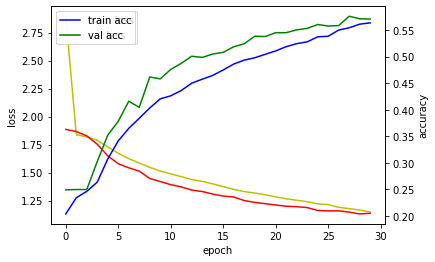

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
def get_emotion(ohv):
    indx = np.argmax(ohv)
        
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

1/1 [==============================] - 0s 171ms/step


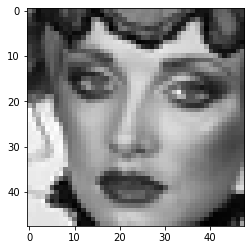

> testing image index: 3576
> true emotion: neutral
> predicted emotion: neutral


In [ ]:
# 2163
img_indx = np.uint32(np.random.rand()*(test_set.shape[0] - 1))
sample = x_test[img_indx, :]
sample = sample.reshape(48, 48)

pred_cls = model_1.predict(sample.reshape(1, 48, 48, 1))

plt.imshow(sample, cmap='gray')
plt.show()
print('> testing image index: %d\n> true emotion: %s\n> predicted emotion: %s' % (img_indx, get_emotion(y_test[img_indx, :]), get_emotion(pred_cls)))

In [ ]:
layer_names = [layer.name for layer in model_1.layers]
layer_names

['conv1_1',
 'conv1_2',
 'pooling1',
 'conv_dropout1',
 'conv2_1',
 'conv2_2',
 'pooling2',
 'conv_dropout2',
 'conv3_1',
 'conv3_2',
 'pooling3',
 'conv_dropout3',
 'flatten',
 'fc1',
 'fc_dropout1',
 'fc_softmax']

In [ ]:
model_1.layers

In [ ]:
layer_outputs = [layer.output for layer in model_1.layers]

In [ ]:
feature_map_model = tf.keras.models.Model(model_1.input, layer_outputs)

In [ ]:
feature_maps = feature_map_model.predict(sample.reshape(1, 48, 48, 1))

1/1 [==============================] - 0s 65ms/step


In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv1_1 is =======>> (1, 48, 48, 64)
The shape of the conv1_2 is =======>> (1, 46, 46, 64)
The shape of the pooling1 is =======>> (1, 23, 23, 64)
The shape of the conv_dropout1 is =======>> (1, 23, 23, 64)
The shape of the conv2_1 is =======>> (1, 23, 23, 128)
The shape of the conv2_2 is =======>> (1, 21, 21, 128)
The shape of the pooling2 is =======>> (1, 10, 10, 128)
The shape of the conv_dropout2 is =======>> (1, 10, 10, 128)
The shape of the conv3_1 is =======>> (1, 10, 10, 256)
The shape of the conv3_2 is =======>> (1, 8, 8, 256)
The shape of the pooling3 is =======>> (1, 4, 4, 256)
The shape of the conv_dropout3 is =======>> (1, 4, 4, 256)
The shape of the flatten is =======>> (1, 4096)
The shape of the fc1 is =======>> (1, 2048)
The shape of the fc_dropout1 is =======>> (1, 2048)
The shape of the fc_softmax is =======>> (1, 7)


In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        k = feature_map.shape[-1]  
        size=feature_map.shape[1]
        for i in range(k):
            feature_image = feature_map[0, :, :, i]
            feature_image-= feature_image.mean()
            feature_image/= feature_image.std ()
            feature_image*=  64
            feature_image+= 128
            feature_image= np.clip(img_indx, 0, 255).astype('uint8')
            image_belt[:, i * size : (i + 1) * size] = feature_image    

NameError: name 'image_belt' is not defined

In [34]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 30.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 26.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 21.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing 

SyntaxError: ignored